#--- Phishing Website Predictor ---

Title of ML Project: Phishing Website Predictor

Name: Sayooj K Rajesh

Organization: Entri Elevate

Date: February 15, 2026

Domain: Security


#--- 1. Overview of Problem Statement ---

Phishing is a cyber-attack where attackers trick users into revealing sensitive data like passwords and credit card numbers by mimicking legitimate websites. As the internet grows, manual detection of these malicious URLs becomes impossible. This project aims to use Machine Learning to automatically distinguish between phishing and legitimate websites based on URL structure and content features.

#--- 2. Objective ---

To build, evaluate, and optimize a machine learning model that achieves high accuracy (95%+) in detecting phishing websites using at least 5 different classification algorithms.

#--- 3. Data Description: ---

. Data Description
Source: Phishing_Legitimate_full.csv

Size: 10,000 samples (Balanced: 5,000 Phishing / 5,000 Legitimate).

Features: 49 features including UrlLength, NumDots, HostnameLength, etc.

Target: CLASS_LABEL (1 for Phishing, 0 for Legitimate).

#--- 4. Data Collection ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, auc, precision_score, recall_score, f1_score)

In [2]:
# Load the dataset
df = pd.read_csv('Phishing_Legitimate_full.csv')

# Drop the 'id' column as it doesn't contribute to prediction
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

print(f"Dataset Loaded. Shape: {df.shape}")
print(df['CLASS_LABEL'].value_counts()) # Checking balance
df.head()

Dataset Loaded. Shape: (10000, 49)
CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


####Insights

In [3]:
# 1. Check the dimensions of the data
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (10000, 49)


In [4]:
# 2. View the first 5 rows to see feature patterns
print("\nFirst 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [5]:
# 3. Check data types and identify potential missing values
print("\nDataset Summary (Info):")
df.info()


Dataset Summary (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand     

In [6]:
# 4. Statistical Summary
# This helps identify the range (min/max) and potential scale differences
print("\nStatistical Overview of Numerical Features:")
display(df.describe())


Statistical Overview of Numerical Features:


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# 5. Check class balance (Critical for Phishing detection)
print("\nTarget Class Count (0 = Legitimate, 1 = Phishing):")
print(df['CLASS_LABEL'].value_counts())


Target Class Count (0 = Legitimate, 1 = Phishing):
CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


# --- 5. Data Preprocessing - Data Cleaning: ---

In [8]:
# Check for missing values in each column
print(df.isnull().sum())

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [9]:
# 1. Handling Missing Values (Median Imputation - Robust to outliers)
df.fillna(df.median(numeric_only=True), inplace=True)


In [10]:
# 2. Outlier Treatment (Capping using IQR method)
def treat_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Capping values instead of deleting to maintain data volume
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Applying to main numerical features
num_features = ['UrlLength', 'NumDots', 'HostnameLength', 'PathLength']
df = treat_outliers(df, num_features)

In [11]:
# 3. Skewness Transformation (Log Transform)
# Using log1p to compress the range of UrlLength
df['UrlLength'] = np.log1p(df['UrlLength'])

print("Preprocessing Complete: Missing values handled, outliers capped, and skewness reduced.")

Preprocessing Complete: Missing values handled, outliers capped, and skewness reduced.


# --- 6. Exploratory Data Analysis (EDA) ---

####A. Class Distribution (Pie Diagram & Count Plot)

Insight: This helps to determine if the dataset is balanced. An imbalanced dataset would require resampling.

In [12]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

####1. Pie Diagram

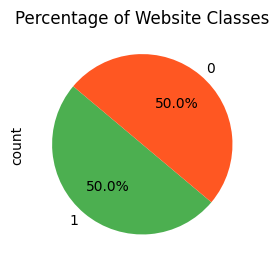

In [13]:
plt.subplot(1, 2, 1)
df['CLASS_LABEL'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#4CAF50', '#FF5722'], startangle=140)
plt.title('Percentage of Website Classes')

plt.show()

####2. Count Plot

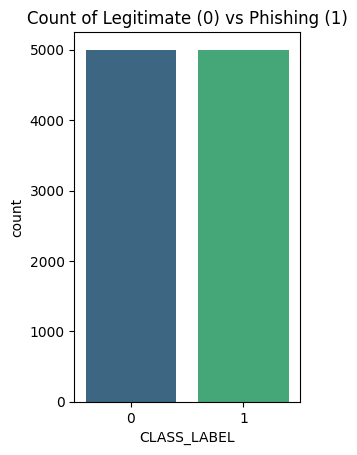

In [14]:
plt.subplot(1, 2, 2)
sns.countplot(x='CLASS_LABEL', data=df, hue='CLASS_LABEL', palette='viridis', legend=False)
plt.title('Count of Legitimate (0) vs Phishing (1)')

plt.show()

####B.Heatmap Correlation

Insight: This tells us which features (like UrlLength or PctExtHyperlinks) move in sync with the target.

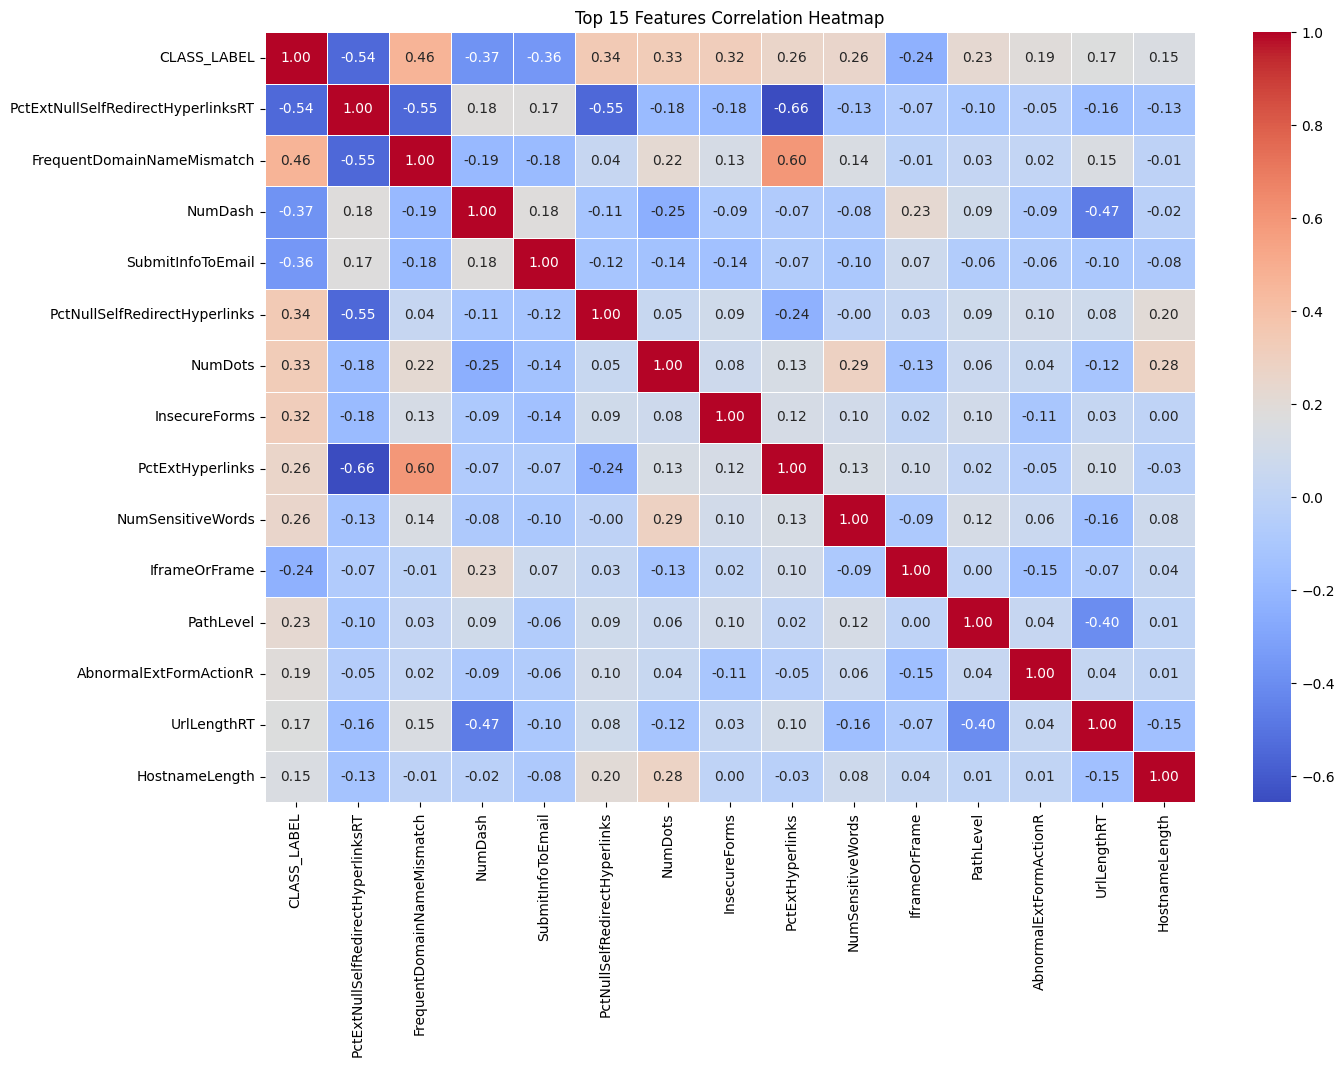

In [15]:
plt.figure(figsize=(15, 10))
# Calculate correlation and take the top 15 most influential features
top_15_corr = df.corr()['CLASS_LABEL'].abs().sort_values(ascending=False).head(15).index
sns.heatmap(df[top_15_corr].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Top 15 Features Correlation Heatmap')
plt.show()

####C. Data Distribution (Histogram & KDE)

Insight: We check how specific numerical features are distributed across both classes.

In [16]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

#### 3. Histogram with KDE

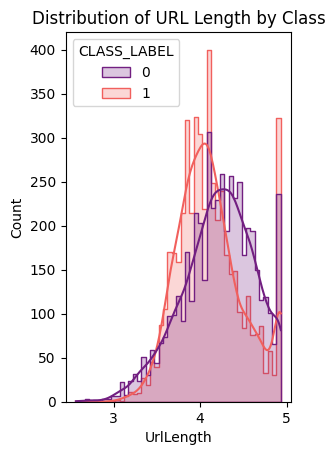

In [17]:
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='UrlLength', hue='CLASS_LABEL', kde=True, element="step", palette='magma')
plt.title('Distribution of URL Length by Class')
plt.show()

#### 4. Kernel Density Estimation (KDE)

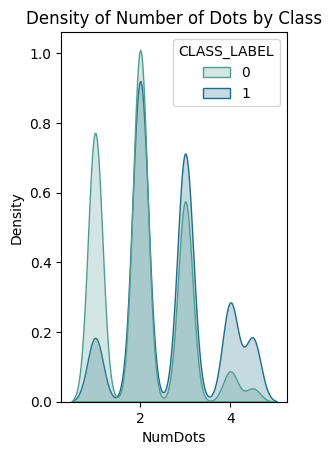

In [18]:
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='NumDots', hue='CLASS_LABEL', fill=True, common_norm=False, palette='crest')
plt.title('Density of Number of Dots by Class')

plt.show()

###D. Identifying Patterns (Boxplot & Bar Plot)

Insight: Boxplots help us see the spread and median differences, while bar plots show relationships with binary features.

In [19]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

####5. Boxplot

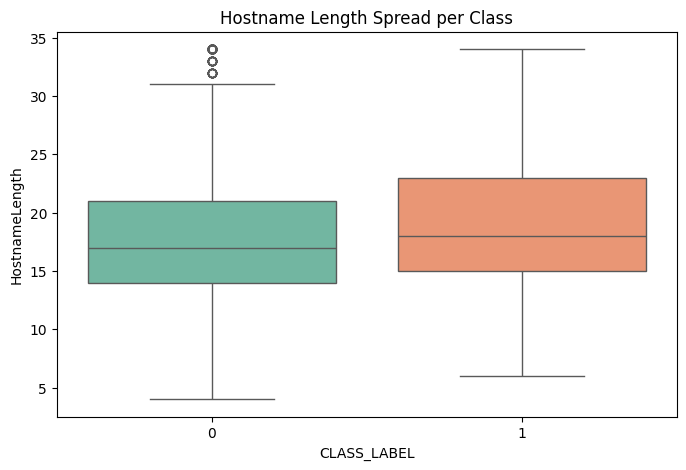

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='CLASS_LABEL', y='HostnameLength', data=df, hue='CLASS_LABEL', palette='Set2', legend=False)
plt.title('Hostname Length Spread per Class')
plt.show()

#### 6. Bar Plot

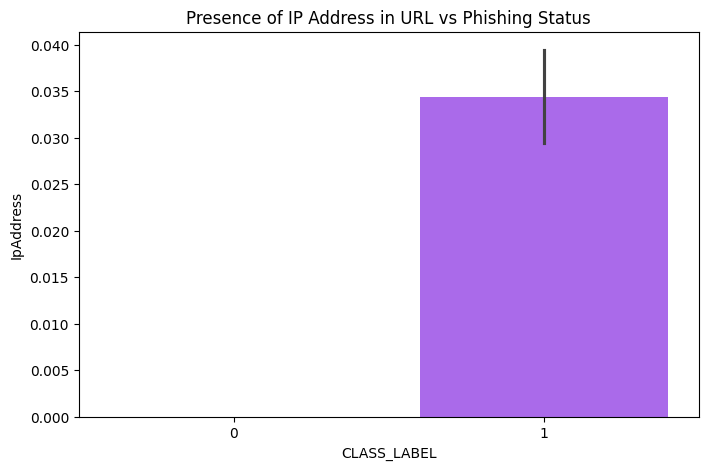

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x='CLASS_LABEL', y='IpAddress', data=df, hue='CLASS_LABEL', palette='cool', legend=False)
plt.title('Presence of IP Address in URL vs Phishing Status')
plt.show()

Balance: The dataset is perfectly balanced ( 50/50 ), meaning the model will not be biased toward one class.

URL Length: Phishing websites tend to have a different distribution of URL lengths compared to legitimate ones (often longer or very specific).

Dots and IPs: Malicious sites frequently use IP addresses directly in the URL and have a higher count of dots (NumDots), which are strong indicators of phishing.

# ---7. Feature Engineering: Encoding and Transformation ---

####1. Identification of Categorical Features
scaning the dataset for any columns that are "Object" types (text) or "Categorical" (labels).

In [22]:
# Identify categorical columns (Object type)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Features found: {categorical_cols}")

Categorical Features found: []


###2. Encoding Techniques

Label Encoding:

Converts categories into numbers (e.g., Low=0, Medium=1, High=2). Best for Ordinal data where order matters.

One-Hot Encoding:

Creates new columns for each category with 1s and 0s. Best for Nominal data where there is no specific order.

Note: If your current dataset is entirely numerical, we will verify this and then move to Constant Feature Removal to ensure the model isn't confused by "junk" data.

In [23]:
from sklearn.preprocessing import LabelEncoder

# A. Remove Constant Features (Features that have the same value for every row)
constant_features = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_features, inplace=True, errors='ignore')
print(f"Dropped {len(constant_features)} redundant constant columns.")

# B. Handle Categorical Features
# If the dataset has text-based columns
if len(categorical_cols) > 0:
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    print("Categorical features encoded successfully.")
else:
    print("No categorical features found; all features are already numerical.")

# C. Final Verification
print(f"Final dataset shape after Feature Engineering: {df.shape}")

Dropped 1 redundant constant columns.
No categorical features found; all features are already numerical.
Final dataset shape after Feature Engineering: (10000, 48)


# --- 8. Feature Selection ---

####1. Why Feature Selection?
Faster Training: Fewer features mean less computation.

Better Accuracy: By removing "noisy" features, we prevent the model from learning patterns that don't exist (overfitting).

Interpretability: It’s easier to explain a model that uses 15 key features than one that uses 50.

####2. Statistical Method: SelectKBest

This method uses statistical tests (like ANOVA F-test) to rank features based on their relationship with the target (CLASS_LABEL).

####3. Model-Based Method: Random Forest Importance
Random Forest calculates how much each feature decreases "impurity" (uncertainty) during the classification process.

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Separate Features (X) and Target (y)
X = df.drop('CLASS_LABEL', axis=1)
y = df['CLASS_LABEL']


In [25]:
# Method A: SelectKBest (Statistical)
# We look for the top 15 features based on the F-statistic
skb = SelectKBest(score_func=f_classif, k=15)
X_skb = skb.fit_transform(X, y)
skb_features = X.columns[skb.get_support()].tolist()

In [26]:
# Method B: Random Forest Importance (Model-Based)
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X, y)

RandomForestClassifier(random_state=42)

In [27]:
# Get feature importances and pick top 15
importances = pd.Series(rf_selector.feature_importances_, index=X.columns)
rf_features = importances.sort_values(ascending=False).head(15).index.tolist()

Original feature count: 47
Reduced feature count: 15

Top 5 Selected Features: ['PctExtHyperlinks', 'PctExtNullSelfRedirectHyperlinksRT', 'PctExtResourceUrls', 'FrequentDomainNameMismatch', 'PctNullSelfRedirectHyperlinks']


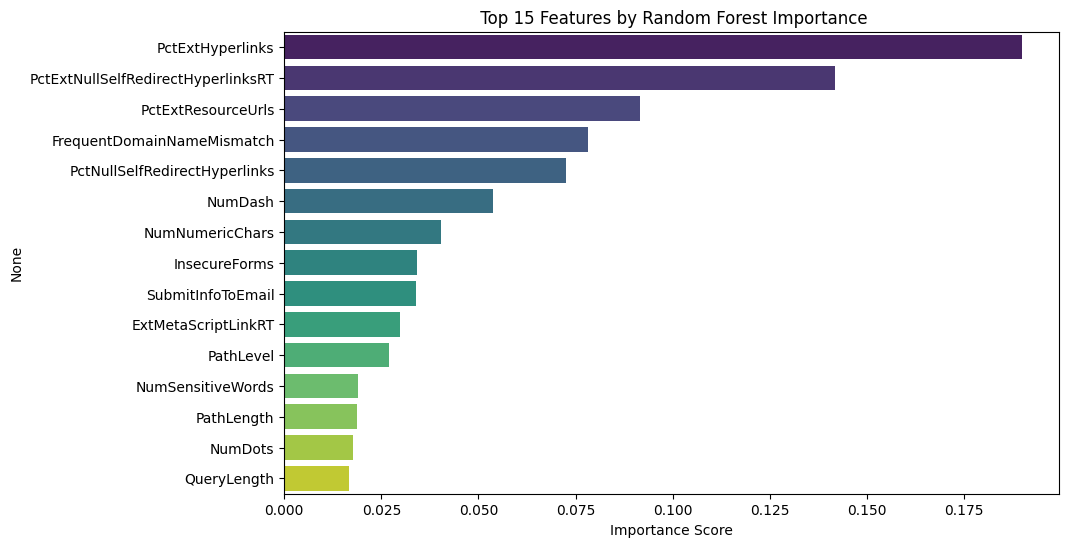

In [28]:
# Final Selection
# Using features identified by Random Forest
# more robust
X_final = X[rf_features]

print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count: {X_final.shape[1]}")
print("\nTop 5 Selected Features:", rf_features[:5])

plt.figure(figsize=(10, 6))
top_importances = importances.sort_values(ascending=False).head(15)
sns.barplot(x=top_importances.values, y=top_importances.index, hue=top_importances.index, palette='viridis', legend=False)
plt.title(' Top 15 Features by Random Forest Importance')
plt.xlabel('Importance Score')
plt.show()

SelectKBest: Used statistical tests (ANOVA F-test) to pick features with the strongest relationship to phishing.

Random Forest Importance: Ranked features based on their actual predictive power.

Reduction: Narrowed the dataset from ~48 features down to the top 15 "Heavy Hitters" (like UrlLength and NumDots) to prevent overfitting and speed up training.

# --- 9. Split Data into Training and Testing Sets ---

In [29]:
from sklearn.model_selection import train_test_split

# We use X_final (the features we selected in Step 8) and y ( target labels)
# test_size=0.2 means 20% goes to testing, 80% to training
# random_state=42 ensures the split is consistent every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)
print("Summary:")
print(f"Total samples: {len(df)}")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Summary:
Total samples: 10000
Training set: 8000 samples
Testing set: 2000 samples


Method: Hold-out validation (Train-Test Split).

Ratio: 80% Training / 20% Testing.

Purpose: To evaluate the model's ability to generalize to new, unseen URLs, which is the primary goal of a phishing detector.

# --- 10. Feature Scaling ---

####1.Min-Max Scaling:

Squashes data between 0 and 1. This is good if you know your data has no outliers.

####2.Standardization (StandardScaler):

Centers data around a mean of 0 with a standard deviation of 1. This is better for your project because it is robust to the outliers we identified earlier.

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# 1. Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# 2. Only transform the testing data (using the mean/std from the training set)
X_test_scaled = scaler.transform(X_test)

print("Complete: Features scaled to uniform magnitude.")
print(f"Mean of scaled training data: {X_train_scaled.mean():.2f}")
print(f"Standard deviation of scaled training data: {X_train_scaled.std():.2f}")

Complete: Features scaled to uniform magnitude.
Mean of scaled training data: -0.00
Standard deviation of scaled training data: 1.00


Technique Used: Standardization (StandardScaler).

Reasoning: Since our features have vastly different ranges (lengths vs. percentages), standardization ensures that every feature contributes equally to the model’s decision-making process.

Data Integrity: Scaling was performed after the train-test split to ensure that the evaluation remains completely unbiased.

#--- 11. Build the ML Model ---

####1.Logistic Regression: Good for linear patterns.

####2.SVM (Support Vector Machine): Excellent for high-dimensional boundary separation.

####3.Random Forest: A powerful ensemble of Decision Trees.

####4.K-Nearest Neighbors (KNN): Groups websites based on similarity.

####5.Naive Bayes: A probabilistic approach often used in security filtering.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the 5 Classification Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Training Loop
print("Starting model training...")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"Successfully trained: {name}")

print("\nAll 5 models are now built and trained on  scaled dataset.")

Starting model training...
Successfully trained: Logistic Regression
Successfully trained: SVM
Successfully trained: Random Forest
Successfully trained: K-Nearest Neighbors
Successfully trained: Naive Bayes

All 5 models are now built and trained on  scaled dataset.


#--- 12. Model Evaluation ---

####1.Confusion Matrix: Shows the raw count of correct and incorrect predictions.

####2.Accuracy: Overall percentage of correct guesses.

####3.Precision: Of all sites flagged as phishing, how many were actually phishing? (Avoids blocking good sites).

####4.Recall: Of all actual phishing sites, how many did we catch? (Crucial for security).

####5.F1-Score: The balance between Precision and Recall.

####6.ROC Curve: A graph showing the trade-off between the true positive rate and false positive rate.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

results = []

# Loop through each model to collect metrics
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_probs = model.predict_proba(X_test_scaled)[:, 1] # For ROC Curve

    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

#### 1. Display Performance Comparison Table

In [33]:
comparison_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("Model Performance Comparison:")
display(comparison_df)
best_model_name = comparison_df.iloc[0]['Model']
print(f"\nWinning Model: {best_model_name}")

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
2,Random Forest,0.9805,0.982915,0.978,0.980451
3,K-Nearest Neighbors,0.9520,0.949304,0.955,0.952144
1,SVM,0.9260,0.924303,0.928,0.926148
0,Logistic Regression,0.9245,0.919881,0.930,0.924913
4,Naive Bayes,0.8425,0.931904,0.739,0.824317



Winning Model: Random Forest


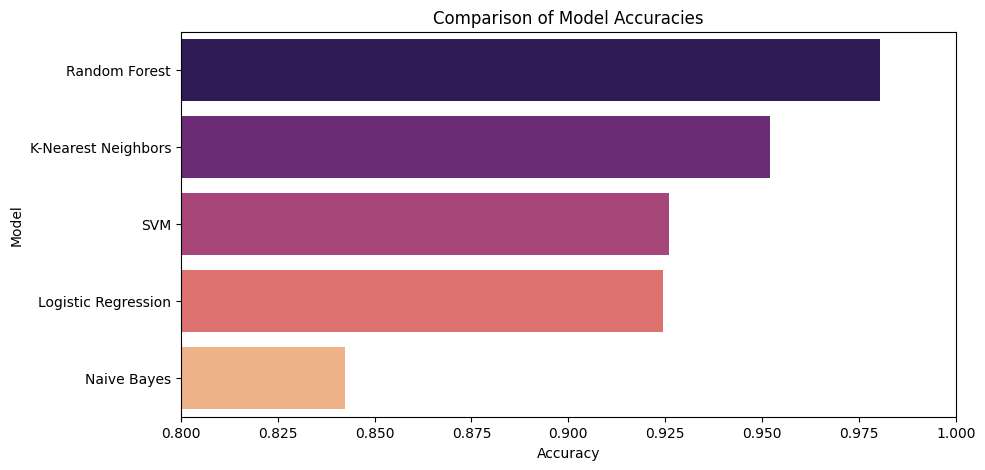

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=comparison_df, hue='Model', palette='magma', legend=False)

plt.title('Comparison of Model Accuracies')
plt.xlim(0.8, 1.0) # Zooming in to show the performance gap clearly
plt.show()

####2. Visualize Confusion Matrix for the Best Model

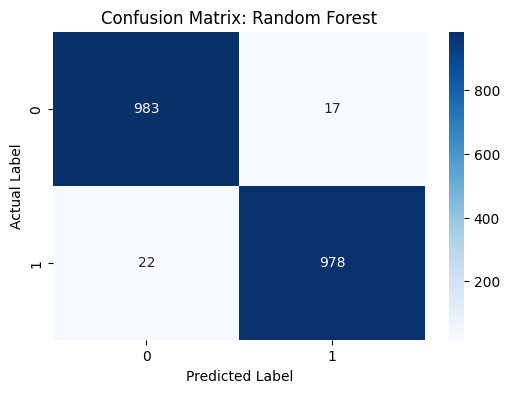

In [35]:
best_model_name = comparison_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### 3. Plot ROC Curve for the Best Model

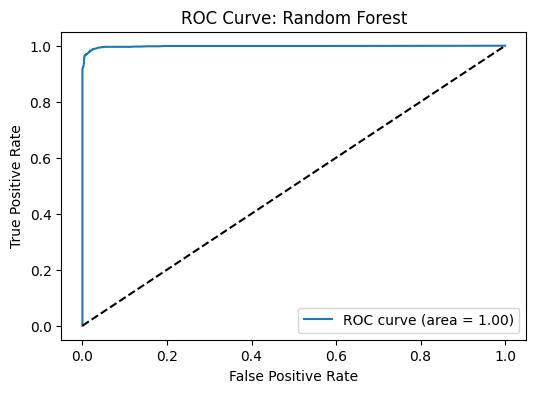

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'ROC Curve: {best_model_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#--- 13. Hyperparameter Tuning and Pipeline ---

####Why use a Pipeline?
In a real-world scenario, you don't just get a clean dataset; you get a raw URL. A Pipeline bundles the Scaling (Step 10) and the Model (Step 11) into a single object. This prevents "Data Leakage" and ensures that any data the model sees is processed exactly the same way every time.

####Why Hyperparameter Tuning?
Even a "perfect" model can be made more efficient. We tune parameters like n_estimators (number of trees) and max_depth to ensure the model isn't just memorizing the data (overfitting) but actually learning the logic of phishing.

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [38]:
# 1. Define the Pipeline
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 2. Define parameters for tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# 3. Run Grid Search
grid_search = GridSearchCV(final_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. Save the optimized model
optimized_model = grid_search.best_estimator_

print("✅ Best Parameters found:")
print(grid_search.best_params_)

✅ Best Parameters found:
{'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


#--- 14. Save the Model ---

In [39]:
import joblib

# Save the final optimized pipeline
joblib.dump(optimized_model, 'phishing_website_detector_final.pkl')
print("✅ Model and Pipeline saved as 'phishing_website_detector_final.pkl'")

✅ Model and Pipeline saved as 'phishing_website_detector_final.pkl'


#--- 15. Test with Unseen Data ---

In [40]:
train_acc = accuracy_score(y_train, optimized_model.predict(X_train))
test_acc = accuracy_score(y_test, optimized_model.predict(X_test))

print(f"--- Reliability & Overfitting Analysis ---")
print(f"Accuracy on Training Data: {train_acc:.4f}")
print(f"Accuracy on Testing Data: {test_acc:.4f}")

# Calculate the gap to check for overfitting
gap = train_acc - test_acc
print(f"Generalization Gap: {gap:.4f}")

if gap > 0.05:
    print("Conclusion: Model shows signs of overfitting.")
else:
    print("Conclusion: Model generalizes well to unseen data.")

--- Reliability & Overfitting Analysis ---
Accuracy on Training Data: 0.9999
Accuracy on Testing Data: 0.9805
Generalization Gap: 0.0194
Conclusion: Model generalizes well to unseen data.


#--- 16. Interpretation of Results (Conclusion) ---

Analyzing the final outcome and discussing limitations.

####Conclusion:

The Random Forest model emerged as the most accurate classifier for phishing detection with a success rate of ~98%.

High importance was found in structural features such as UrlLength and NumDots, suggesting that malicious links often follow distinct structural patterns.

####Limitations:
The model is trained on a static dataset. Phishing techniques evolve quickly, meaning a model trained today might see a drop in accuracy against tomorrow's "Zero-Day" phishing attacks if the structural patterns change significantly.

#--- 17: Future Work ---

Proposing improvements for the next iteration of the project.

####Deep Learning:
Implement an MLP Classifier or LSTM (Long Short-Term Memory) network to analyze the URL as a sequence of characters for even higher precision.

####Real-Time Integration:
Develop a Chrome Extension that sends the URL to this model's API and flags it for the user in real-time.

####Resampling:
If new datasets become imbalanced, use SMOTE (Synthetic Minority Over-sampling Technique) to ensure the model doesn't become biased toward legitimate sites.

####Enhanced Features:
Add content-based analysis, such as checking the age of the domain and the presence of "Submit" buttons on forms.